In [5]:
# import thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [6]:
# đọc dữ liệu
df = pd.read_csv("D:\Desktop\Data_Analyst\Jupiter_Notebook_Pandas\Pandas\OnlineRetail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
# Lấy dữ liệu cần thiết
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) #chuyển InvoiceDate thành datetime object
d1 = df[['InvoiceNo', 'InvoiceDate', 'Quantity', 'UnitPrice']] #lấy các cột dữ liệu cần thiết
d1['Revenue'] = d1['Quantity'] * d1['UnitPrice'] #tính doanh thu trên mỗi row
d1 = d1.set_index(['InvoiceDate']) #chuyển mỗi giá trị InvoiceDate thành index của mỗi để search theo index
d2 = d1['2011'] #lọc những hàng mà index có chứa '2011'
d2 = d2.reset_index()
d3 = d2.groupby(by=d2['InvoiceDate'].dt.month).sum() #tính tổng doanh thu theo tháng

d4 = d1.drop_duplicates(subset = 'InvoiceNo', keep = 'first') # xóa bỏ các dòng trùng lặp của cùng một đơn hàng
d4 = d4['2011']
d4 = d4.reset_index()
d5 = d4.groupby(by=d4['InvoiceDate'].dt.month).count() #đếm tổng số đơn hàng trong tháng

<ipython-input-7-dd9504cd5b2a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['Revenue'] = d1['Quantity'] * d1['UnitPrice'] #tính doanh thu trên mỗi row
<ipython-input-7-dd9504cd5b2a>:6: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  d2 = d1['2011'] #lọc những hàng mà index có chứa '2011'
<ipython-input-7-dd9504cd5b2a>:11: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  d4 = d4['2011']


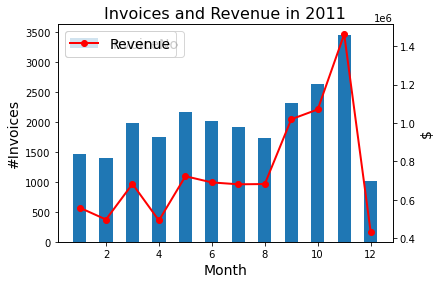

In [8]:
# Vẽ biểu đồ kết hợp
x = d5.index.get_level_values(0)
plt.bar(x, d5['InvoiceNo'], width = 0.5, label = 'InvoiceNo')
axes1 = plt.gca()
axes2 = axes1.twinx()
axes2.plot(x, d3['Revenue'], label = 'Revenue', linewidth = 2, c = 'r', marker = 'o')
axes1.set_xlabel('Month', fontsize = 14)
axes1.set_ylabel('#Invoices', fontsize = 14)
axes2.set_ylabel('$', fontsize = 14)

axes1.legend(fontsize = 14)
axes2.legend(fontsize = 14)
plt.title('Invoices and Revenue in 2011', fontsize = 16)
plt.show()

#### Nhận xét: Tháng 4 có tổng số đơn hàng nhiều hơn tháng 2. Tuy nhiên tổng doanh thu thì chỉ tương đương. Tháng 9, 10, 11 tổng số đơn hàng nhiều và tổng doanh thu cũng tăng nhanh chóng.